In [15]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
from xmitgcm import open_mdsdataset
import warnings
warnings.filterwarnings('ignore')

In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [35]:
# Functions
def plot_ssh(ds, nt, vmin=-0.3, vmax=0.3):
    W1 = ds['ETAN'][nt,:,:]
    W2 = ds['ETAN'][nt+1,:,:]
    W3 = ds['ETAN'][nt+2,:,:]
   
    fig, ((ax0,ax1,ax2)) = plt.subplots(1,3,figsize=(15,5), sharey=True, sharex=True)
    ax0.set_facecolor('tan')
    ax1.set_facecolor('tan')
    ax2.set_facecolor('tan')
   
    pc = ax0.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),
                       cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax0.contour(LON,LAT, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax0.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax1.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax1.contour(LON,LAT, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax1.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax2.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax2.contour(LON,LAT, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax2.contour(LON,LAT,depth, levels=[0,250], colors='k')

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.delta),
                      cax=cbar_ax, orientation='vertical',label='cm')
    
    ax0.set_xlabel('Lon')
    ax1.set_xlabel('Lon')
    ax2.set_xlabel('Lon')
    ax0.set_ylabel('Lat')
    
    ax0.set_title(r'$\eta$ at %1.2f days'%(time[nt]/(24*3600)))
    ax1.set_title(r'$\eta$ at %1.2f days'%(time[nt+1]/(24*3600)))
    ax2.set_title(r'$\eta$ at %1.2f days'%(time[nt+2]/(24*3600)))
    
    ax0.set_xlim(-121,-114)
    ax0.set_ylim(27,35)
    for ax in [ax0,ax1,ax2]:
        ax.set_aspect(1)
    return(fig,ax0,ax1,ax2)

In [18]:
# Read data and bathy
outdir = '/data/SO2/sio-kramosmusalem/02_spinup_feb_output/'
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)

In [29]:
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(1,16)*(24*3600)

### Domain 
* Light grey contour: 250 m (shelf break)
* Black contour: 0 m

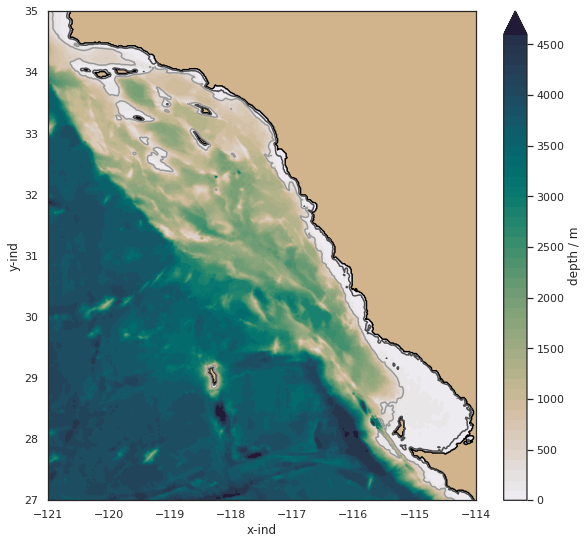

In [30]:
sns.set_style('white')
fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depth, mask=mask_dep),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0','0.3','0.6'], levels=[0,20,250])

cb.set_label('depth / m')
ax.set_xlabel('x-ind')
ax.set_ylabel('y-ind')
ax.set_xlim(-121,-114)
ax.set_ylim(27,35)
ax.set_aspect(1)

### SSH 
* 10 min averages
* Black: 0 and 250 m depth contours
* Grey: 0 m ssh 

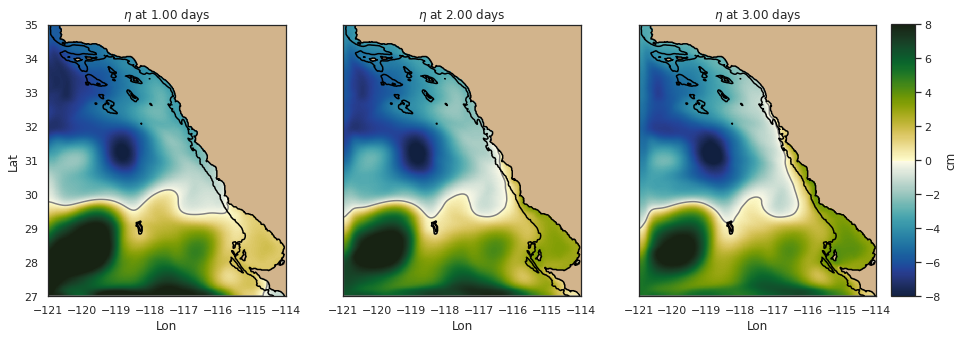

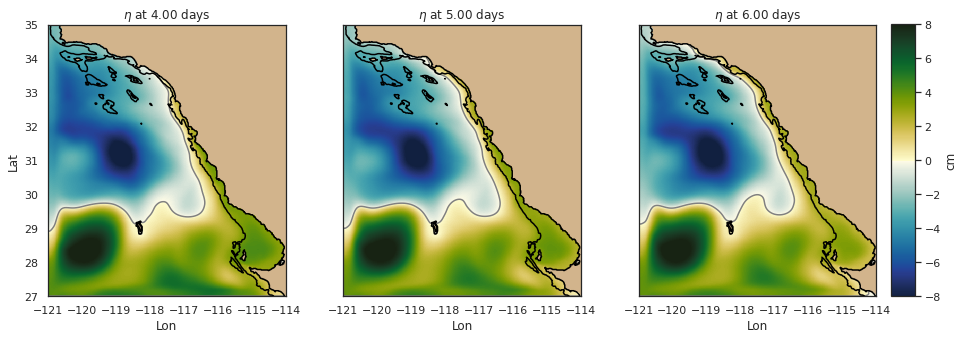

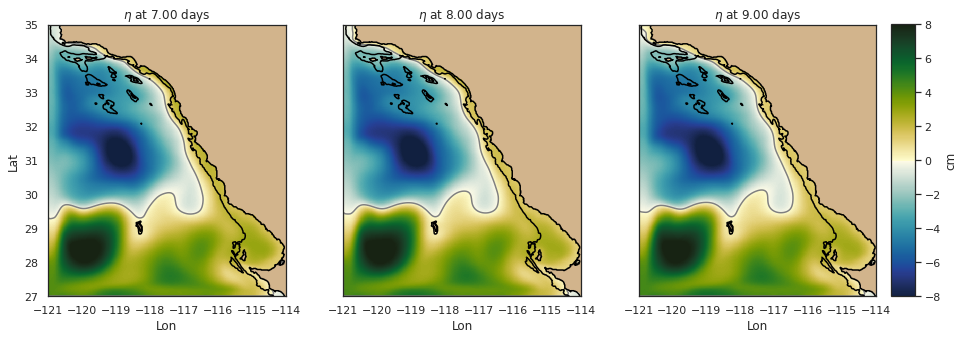

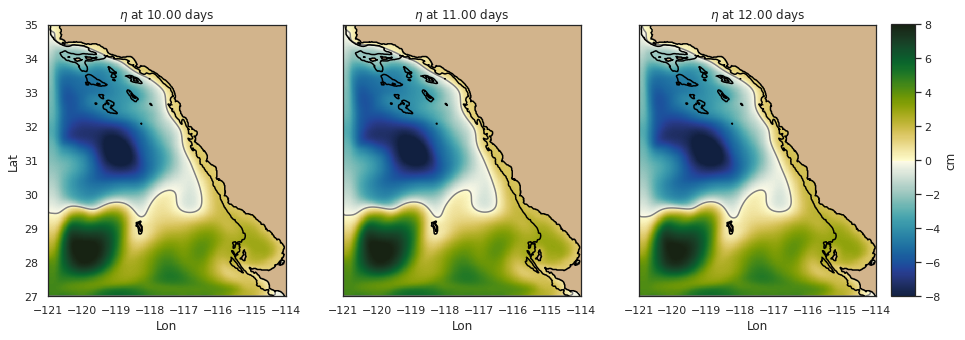

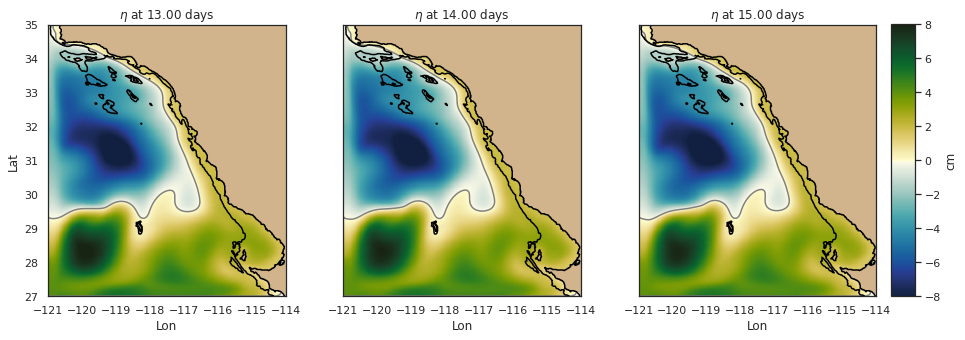

In [39]:
sns.set_context('notebook')
for nt in range(0,15,3):
    fig,ax0,ax1,ax2 = plot_ssh(ds,nt, vmin=-8, vmax=8)